# Constructing the Data 
In this note book the build_dataset functions will be tested and demonstrated. The data will be tic data of the ADAEUR crypto market pair from Kraken.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from src.data import build_dataset as bd

First we generate the raw dataframe by combining the data from the pickle files into a single dataframe using the constructRawData() function.

In [12]:
data = bd.constructRawData(r'C:\Users\luciu\cryptodata\ADAEUR/')

In [3]:
data = pd.read_pickle('ADAEUR_raw_2019_03.pkl')

## Sample Bars
Now we will use the sampling functions to turn this newly generated raw data into bar data indexed by date and with columns = { olhc, volume, value, wavg }

In [8]:
hour_bar = bd.sampleTimeBars(data=data,interval='H')
day_bar= bd.sampleTimeBars(data, 'D')

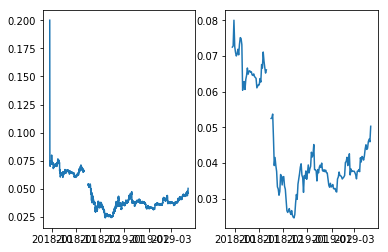

In [16]:
plt.subplot(1,2,1)
plt.plot(hour_bar.close)
plt.subplot(1,2,2)
plt.plot(day_bar.close);

Tic bars sample the data after a given number of trades or 'tics'. The sampleTicBars() function is used on the raw data below.

In [11]:
tic_bar = bd.sampleTicBars(data, 1000)

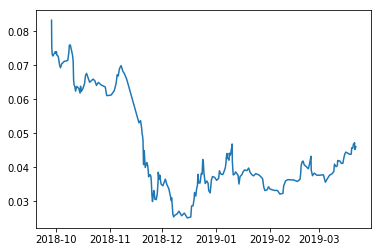

In [24]:
plt.plot(tic_bar.wavg[1:]);

As you can see there is an issue with the sampling. It does not factor the break in the original raw data likely from an outage or issue with the exchange. In practise care must be taken with gaps in data and the do multiple samplings.


Similar to tic bar are constant volume and euro bars. These sample the data after some amount of volume(euros) has been traded. The functions to sample data in this fashion are demo's below. Note again that care must be taken with data with gaps, multiple samplings should be carried out.

In [14]:
vol_bar = bd.sampleConstantVolumeBars(data, 500000)

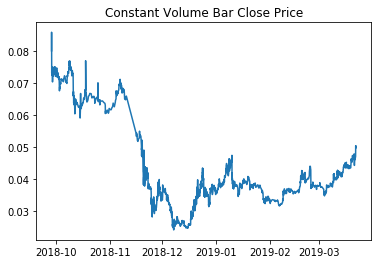

In [15]:
plt.plot(vol_bar.close)
plt.title('Constant Volume Bar Close Price');

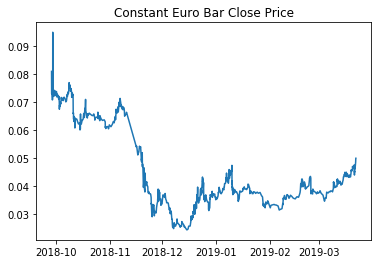

In [17]:
euro_bar = bd.sampleConstantEuroBars(data, 50000)
plt.plot(euro_bar.close[5:])
plt.title('Constant Euro Bar Close Price');

The rolling volume(euro) bar data use the rolling mean volume or euro value traded as a figure to sample rather than selecting an arbirtrary value. Two parameters are used to control the sampling. First the window size which over which the mean is computer (selecting 0 window size uses an expanding window rather than rolling) and the other indicates the approximate granularity of the sampling. This granularity is the same are used in the time bars.

In [20]:
daily_euro_bar = bd.sampleRollingEuroBars(data,100,'D')

In [21]:
hourly_euro_ber = bd.sampleRollingEuroBars(data,100,'H')

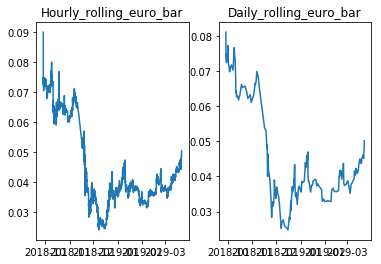

In [25]:
plt.subplot(1,2,1)
plt.plot(hourly_euro_ber.close[7:])
plt.title('Hourly_rolling_euro_bar')
plt.subplot(1,2,2)
plt.plot(daily_euro_bar.close)
plt.title('Daily_rolling_euro_bar');

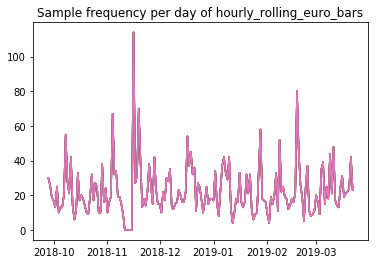

In [29]:
plt.plot(hourly_euro_ber.resample('D').count())
plt.title('Sample frequency per day of hourly_rolling_euro_bars');

The above graph shows the change in frequency of sampling over time. The rolling mean ensures that on average the data is sample once an hour, that is ~24 times a day. On the days where there is relatively more market action in the form of more euros being traded the sampling frequency is much higher and so the sampling is done in proportion to the amount of money traded which is an indicator of information.

Finally all these different sampling methods can be called using the sampleBars() function. Just indicate the sampling using the parameter 'method'. Below is ademonstration of this function to sample using the expanding window euro bar method.

In [4]:
expanding_euro_bar = bd.sampleBars(data,method='rolling euro bars',interval=0)

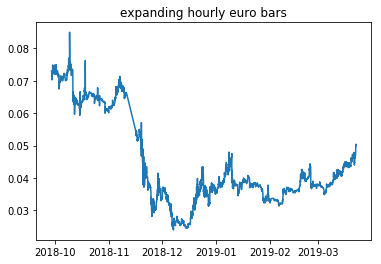

In [5]:
plt.plot(expanding_euro_bar.close[5:])
plt.title('expanding hourly euro bars');

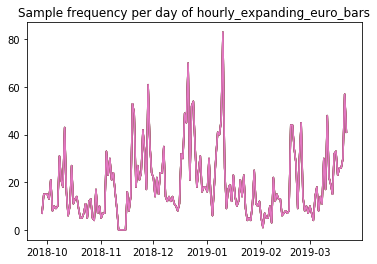

In [7]:
plt.plot(expanding_euro_bar.resample('D').count())
plt.title('Sample frequency per day of hourly_expanding_euro_bars');

In [2]:
import datetime
str(datetime.datetime.now())

'2019-12-08 17:31:16.227043'